In [87]:
import numpy as np

def distance(p1, p2):
    """Calcula distances entre dois pontos"""
    return np.sqrt(np.sum(np.power(p2-p1,2)))

In [9]:
import random

def majority_vote(votes):
    """
    Retorna o elemento mais comum no parametro informado
    """
    vote_counts = {}
    for vote in votes:
        if vote in vote_counts:
            vote_counts[vote] += 1
        else:
            vote_counts[vote] = 1
            
    winners = []
    max_count = max(vote_counts.values())
    for vote, count in vote_counts.items():
        if count == max_count:
            winners.append(vote)
    return random.choice(winners)

In [10]:
votes = [1,2,3,1,2,3,4,3,2,3,3,2,2,3,1,2,1]
winner = majority_vote(votes)

In [11]:
import scipy.stats as ss
def majority_vote_short(votes):
    """
    Retorna o elemento mais comum no parametro informado
    """
    mode, count = ss.mstats.mode(votes)
    return mode

Define o array com valores e em seguida chama a funçao para identificar o valor que mais se repete

In [89]:
votes = [1,2,3,1,2,3,4,3,2,3,3,2,2,3,1,2,1, 3, 3,3]
majority_vote_short(votes)

array([3.])

In [13]:
a = {'a':2, 'b' : 5}

In [14]:
a.items()

dict_items([('a', 2), ('b', 5)])

In [15]:
random.choice([1])

1

In [16]:
points = np.array([[1,1],[1,2],[1,3],[2,1],[2,2],[2,3],[3,1],[3,2],[3,3]])

p = np.array([2.5,2])

distances = np.zeros(points.shape[0])
for i in range(len(distances)):
    distances[i] = distance(p, points[i])

In [17]:
distances

array([1.80277564, 1.5       , 1.80277564, 1.11803399, 0.5       ,
       1.11803399, 1.11803399, 0.5       , 1.11803399])

In [18]:
ind = np.argsort(distances)
ind

array([4, 7, 3, 5, 6, 8, 1, 0, 2], dtype=int64)

In [19]:
distances[ind[0:2]]

array([0.5, 0.5])

In [20]:
def find_nearest_neighbors(p, points, k=5):
    """
    retorna os indices de KNN
    """
    distances = np.zeros(points.shape[0])
    for i in range(len(distances)):
        distances[i] = distance(p, points[i]) 
    ind = np.argsort(distances)
    return ind[:k]

In [21]:
ind = find_nearest_neighbors(p, points, 3)
print(points[ind])

[[2 2]
 [3 2]
 [2 1]]


In [22]:
def knn_predict(p, points, outcomes, k=5):
    ind = find_nearest_neighbors(p, points, k)
    return majority_vote(outcomes[ind])

In [23]:
outcomes = np.array([0,0,0,0,1,1,1,1,1])

In [24]:
knn_predict(np.array([2.5, 2.7]), points, outcomes, k=2)

1

In [25]:
knn_predict(np.array([1.0, 2.7]), points, outcomes, k=2)

0

In [26]:
points.shape[0]

9

In [27]:
def generate_synth_data(n=50):
    """
    Cria dois conjuntos de dados seguindo a distribuição Gaussiana
    """
    points = np.concatenate((ss.norm(0,1).rvs((n,2)), ss.norm(1,1).rvs((n,2))), axis=0)
    outcomes = np.concatenate((np.repeat(0,n), np.repeat(1,n)))
    return (points, outcomes)

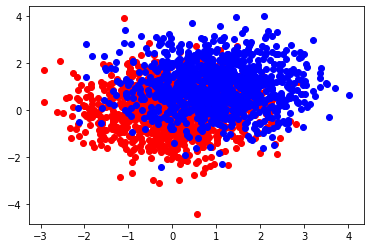

In [28]:
n = 1000
(points, outcomes) = generate_synth_data(n)

import matplotlib.pyplot as plt

plt.figure()
plt.plot(points[:n,0], points[:n,1], "ro")
plt.plot(points[n:,0], points[n:,1], "bo")

In [58]:
def make_prediction_grid(predictors, outcomes, limits, h, k):
    """
    Classifica cada ponto no grid
    """
    (x_min, x_max, y_min, y_max) = limits
    xs = np.arange(x_min, x_max, h)
    ys = np.arange(y_min, y_max, h)
    xx, yy = np.meshgrid(xs, ys)
    
    prediction_grid = np.zeros(xx.shape, dtype=int)
    for i,x in enumerate(xs):
        for j,y in enumerate(ys):
            p = np.array([x,y])
            prediction_grid[j,i] = knn_predict(p, predictors, outcomes, k)
            
    return (xx, yy, prediction_grid)

In [45]:
seasons = ["spring","summer","fall","winter"]

In [46]:
seasons

['spring', 'summer', 'fall', 'winter']

In [47]:
enumerate(seasons)

In [48]:
list(enumerate(seasons))

[(0, 'spring'), (1, 'summer'), (2, 'fall'), (3, 'winter')]

In [49]:
def plot_prediction_grid (xx, yy, prediction_grid, filename):
    """ Plot KNN predictions for every point on the grid."""
    from matplotlib.colors import ListedColormap
    background_colormap = ListedColormap (["hotpink","lightskyblue", "yellowgreen"])
    observation_colormap = ListedColormap (["red","blue","green"])
    plt.figure(figsize =(10,10))
    plt.pcolormesh(xx, yy, prediction_grid, cmap = background_colormap, alpha = 0.5)
    plt.scatter(predictors[:,0], predictors [:,1], c = outcomes, cmap = observation_colormap, s = 50)
    plt.xlabel('Variable 1'); plt.ylabel('Variable 2')
    plt.xticks(()); plt.yticks(())
    plt.xlim (np.min(xx), np.max(xx))
    plt.ylim (np.min(yy), np.max(yy))
    plt.savefig(filename)

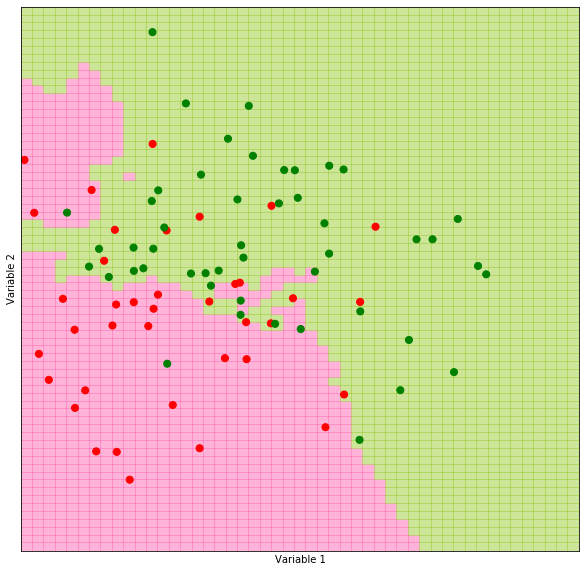

In [59]:
(predictors, outcomes) = generate_synth_data()

k=5; filename="knn_synth_5.pdf"; limits=(-1,4,-3,4); h = 0.1
(xx, yy, prediction_grid) = make_prediction_grid(predictors, outcomes, limits, h, k)
plot_prediction_grid(xx, yy, prediction_grid, filename)

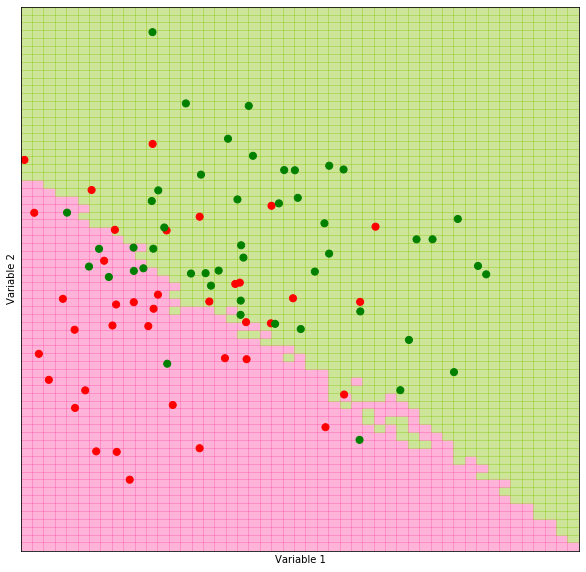

In [60]:
k=50; filename="knn_synth_50.pdf"; limits=(-1,4,-3,4); h = 0.1
(xx, yy, prediction_grid) = make_prediction_grid(predictors, outcomes, limits, h, k)
plot_prediction_grid(xx, yy, prediction_grid, filename)

<h2>Applying the kNN Method</2>

In [61]:
from sklearn import datasets
iris = datasets.load_iris()

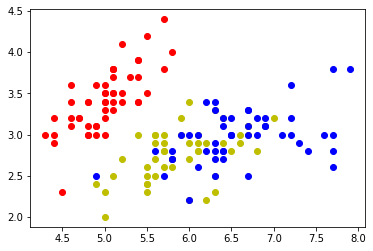

In [69]:
predictors = iris.data[:, 0:2]
outcomes = iris.target
plt.plot(predictors[outcomes==0][:,0], predictors[outcomes==0][:,1], "ro")
plt.plot(predictors[outcomes==1][:,0], predictors[outcomes==1][:,1], "yo")
plt.plot(predictors[outcomes==2][:,0], predictors[outcomes==2][:,1], "bo")

plt.savefig("iris.pdf")

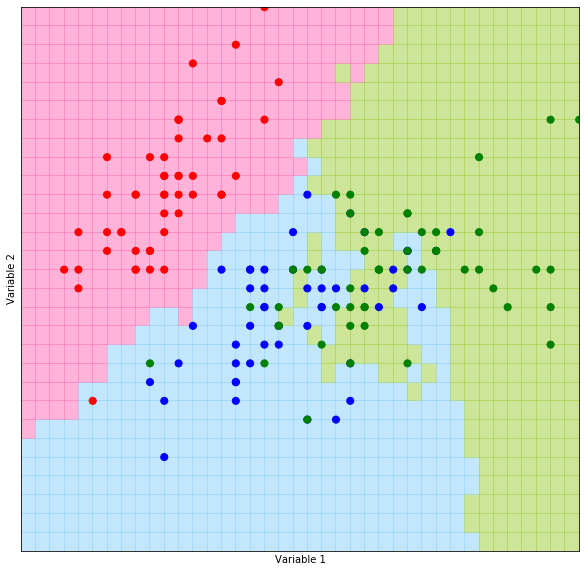

In [70]:
k=5; filename="iris_grid.pdf"; limits=(4,8,1.5,4.5); h = 0.1
(xx, yy, prediction_grid) = make_prediction_grid(predictors, outcomes, limits, h, k)
plot_prediction_grid(xx, yy, prediction_grid, filename)

In [74]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)

In [75]:
knn.fit(predictors, outcomes)
sk_predictions = knn.predict(predictors)

In [79]:
my_predictions = np.array([knn_predict(p, predictors, outcomes, 5) for p in predictors])

In [84]:
print(100.0 * np.mean(sk_predictions == my_predictions))

96.0


In [85]:
print(100.0 * np.mean(sk_predictions == outcomes))

83.33333333333334


In [86]:
print(100.0 * np.mean(my_predictions == outcomes))

84.66666666666667
